In [10]:
# -*- coding: utf-8 -*-
"""
Created on 2018-06-28

Blinker analysis: blinking behavior vs laser power

@author: Viva Horowitz
"""

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
import seaborn as sns
import numpy as np
sns.set(style='ticks')
sns.set_context('poster')


In [69]:
os.chdir(r'C:\Users\Viva\Documents\analysis\blinker_analysis\power_dependence,QE4-22-2018.11,00am\taken-2018-06-01')

## open ND 2.4: 
ontimesdf24 = pd.read_csv('4-22-2018.11,00am, 03, ND2,4.txt, rebinncount=2 uptimes.csv')
offtimesdf24 = pd.read_csv('4-22-2018.11,00am, 03, ND2,4.txt, rebinncount=2 downtimes.csv')
#  # convert to list or else the rest of the code won't work.
ontimes24 = list(ontimesdf24['Bright state duration (s)'])
offtimes24 = list(offtimesdf24["Dim state duration (s)"])
                          
## open ND 2.3:
ontimesdf23 = pd.read_csv('4-22-2018.11,00am, 04, ND2,3.txt uptimes.csv')
offtimesdf23 = pd.read_csv('4-22-2018.11,00am, 04, ND2,3.txt downtimes.csv')
#  # convert to list or else the rest of the code won't work.
ontimes23 = list(ontimesdf23['Bright state duration (s)'])
offtimes23 = list(offtimesdf23["Dim state duration (s)"])      

## open ND 2.3:
ontimesdf23_125Hz = pd.read_csv('4-22-2018.11,00am, 04, ND2,3.txt, 125.0 Hz uptimes.csv')
offtimesdf23_125Hz = pd.read_csv('4-22-2018.11,00am, 04, ND2,3.txt, 125.0 Hz downtimes.csv')
#  # convert to list or else the rest of the code won't work.
ontimes23_125Hz = list(ontimesdf23_125Hz['Bright state duration (s)'])
offtimes23_125Hz = list(offtimesdf23_125Hz["Dim state duration (s)"])   
                        
## open ND 2.2:
ontimesdf22 = pd.read_csv('4-22-2018.11,00am, 05, ND2,2.txt uptimes.csv')
offtimesdf22 = pd.read_csv('4-22-2018.11,00am, 05, ND2,2.txt downtimes.csv')
#  # convert to list or else the rest of the code won't work.
ontimes22 = list(ontimesdf22['Bright state duration (s)'])
offtimes22 = list(offtimesdf22["Dim state duration (s)"])  

In [35]:
# http://code.activestate.com/recipes/66472-frange-a-range-function-with-float-increments/
# could also use linspace
def frange(start, end=None, inc=None):
    "A range function, that does accept float increments..."

    if end == None:
        end = start + 0.0
        start = 0.0

    if inc == None:
        inc = 1.0

    L = []
    while 1:
        next = start + len(L) * inc
        if inc > 0 and next >= end:
            break
        elif inc < 0 and next <= end:
            break
        L.append(next)
        
    return L

In [71]:
minontimes = min(min(ontimes24), min(ontimes23), min(ontimes23_125Hz), min(ontimes22))
print(minontimes)

maxontimes = max(max(ontimes24), max(ontimes23),max(ontimes23_125Hz), max(ontimes22))
print(maxontimes)

minofftimes = min(min(offtimes24), min(offtimes23),min(offtimes23_125Hz), min(offtimes22))
print(minofftimes)

maxofftimes = max(max(offtimes24), max(offtimes23), max(offtimes23_125Hz), max(offtimes22))
print(maxofftimes)

0.00799999999998
6.616
0.00799999999998
31.056


In [74]:
#sns.set_palette("GnBu_d")
sns.set_palette("husl",4)

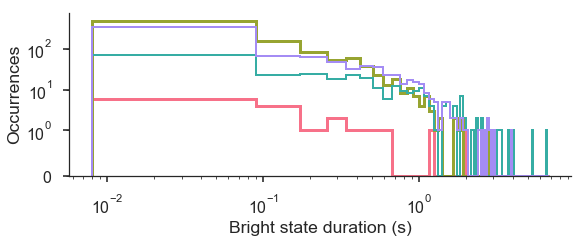

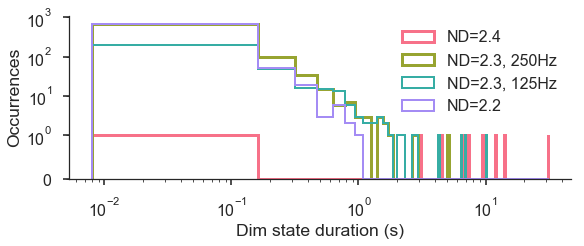

In [85]:
# ** Choose a nice number of bins to see how the data look.
# It's better to have as many bins as possible before the first empty bin.

numonbins = 80
numoffbins = 200

oninc = maxontimes/numonbins
onbins= frange(minontimes,maxontimes+oninc*3,oninc)

offinc = maxofftimes/numoffbins
offbins= frange(minofftimes,maxofftimes+offinc*3,offinc)

plt.figure(figsize=(9,3))
plt.hist(ontimes24, bins=onbins, histtype='step', linewidth=3, label='ND=2.4')
plt.hist(ontimes23, bins=onbins, histtype='step', linewidth=3, label='ND=2.3, 250Hz')
plt.hist(ontimes23_125Hz, bins=onbins, histtype='step', linewidth=2, label='ND=2.3, 125Hz')
plt.hist(ontimes22, bins=onbins, histtype='step', linewidth=2, label='ND=2.2')
plt.xlabel('Bright state duration (s)')
plt.ylabel('Occurrences')
ax = plt.gca()
ax.set_yscale('symlog', linthreshy=1)
ax.set_xscale('log')
#plt.legend()
sns.despine()
plt.show()
plt.figure(figsize=(9,3))
plt.hist(offtimes24, bins=offbins, histtype='step', linewidth=3, label='ND=2.4')
plt.hist(offtimes23, bins=offbins, histtype='step', linewidth=3, label='ND=2.3, 250Hz')
plt.hist(offtimes23_125Hz, bins=offbins, histtype='step', linewidth=2, label='ND=2.3, 125Hz')
plt.hist(offtimes22, bins=offbins, histtype='step', linewidth=2, label='ND=2.2')
plt.xlabel('Dim state duration (s)')
plt.ylabel('Occurrences')
ax = plt.gca()
ax.set_yscale('symlog', linthreshy=1)
ax.set_xscale('log')
plt.legend()
sns.despine()
plt.show()

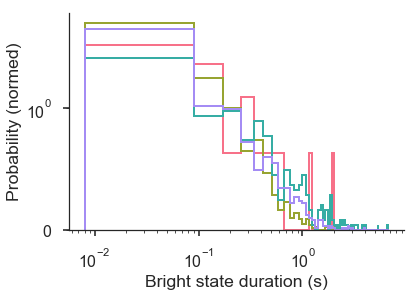

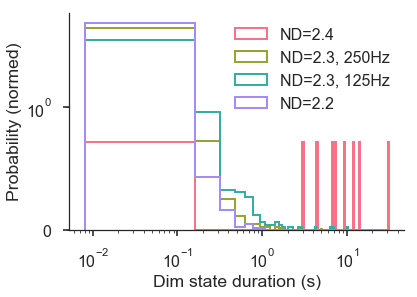

In [88]:
plt.hist(ontimes24, bins=onbins, histtype='step', linewidth=2, label='ND=2.4', normed=True)
plt.hist(ontimes23, bins=onbins, histtype='step', linewidth=2, label='ND=2.3, 250Hz', normed=True)
plt.hist(ontimes23_125Hz, bins=onbins, histtype='step', linewidth=2, label='ND=2.3, 125Hz', normed=True)
plt.hist(ontimes22, bins=onbins, histtype='step', linewidth=2, label='ND=2.2', normed=True)
plt.xlabel('Bright state duration (s)')
plt.ylabel('Probability (normed)')
ax = plt.gca()
ax.set_yscale('symlog', linthreshy=1)
ax.set_xscale('log')
#plt.legend()
sns.despine()
plt.show()
plt.hist(offtimes24, bins=offbins, histtype='step', linewidth=2, label='ND=2.4', normed=True)
plt.hist(offtimes23, bins=offbins, histtype='step', linewidth=2, label='ND=2.3, 250Hz', normed=True)
plt.hist(offtimes23_125Hz, bins=offbins, histtype='step', linewidth=2, label='ND=2.3, 125Hz', normed=True)
plt.hist(offtimes22, bins=offbins, histtype='step', linewidth=2, label='ND=2.2', normed=True)
plt.xlabel('Dim state duration (s)')
plt.ylabel('Probability (normed)')
ax = plt.gca()
ax.set_yscale('symlog', linthreshy=1)
ax.set_xscale('log')
plt.legend()
sns.despine()
plt.show()